<a href="https://colab.research.google.com/github/19PA1A0465/AI-LAB/blob/master/exposis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd # for handling data in the form of tables
import numpy as np # For handling matrix
from sklearn.model_selection import train_test_split # For spliting the data into train and test
from sklearn.linear_model import LinearRegression # for using the model
from sklearn import metrics
import matplotlib.pyplot as plt # for plotting

In [31]:
startupdata=pd.read_csv("50_Startups.csv")
startupdata

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [32]:
startupdata.describe()# to study  all stastics summry


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [33]:
#To check Whether NA's (missingvalues) present in dataset
startupdata.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

<Axes: xlabel='R&D Spend'>

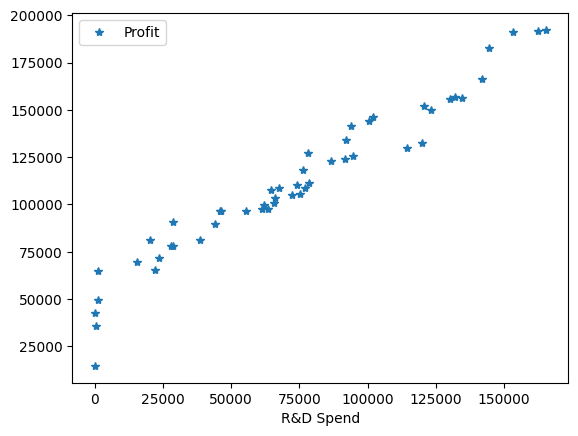

In [34]:
startupdata.plot(x='R&D Spend',y='Profit',style='*')# to how they are corelated

<Axes: xlabel='Administration'>

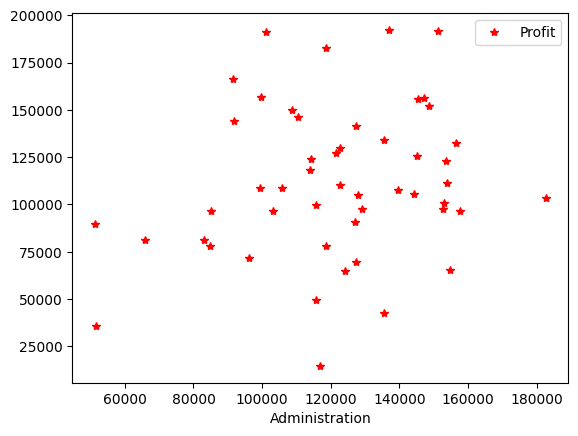

In [35]:
startupdata.plot(x='Administration',y='Profit',style='*',color='red')

<Axes: xlabel='Marketing Spend'>

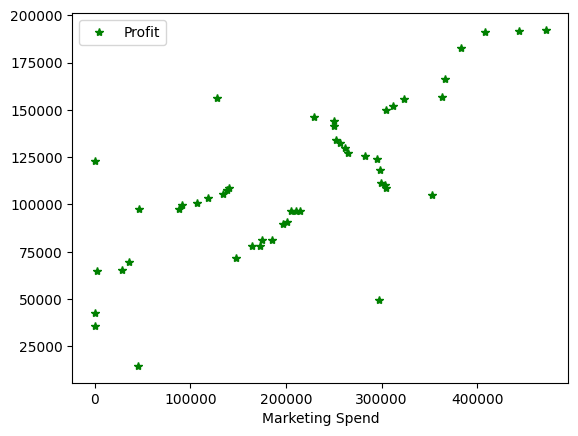

In [36]:
startupdata.plot(x='Marketing Spend',y='Profit',style='*',color='green')

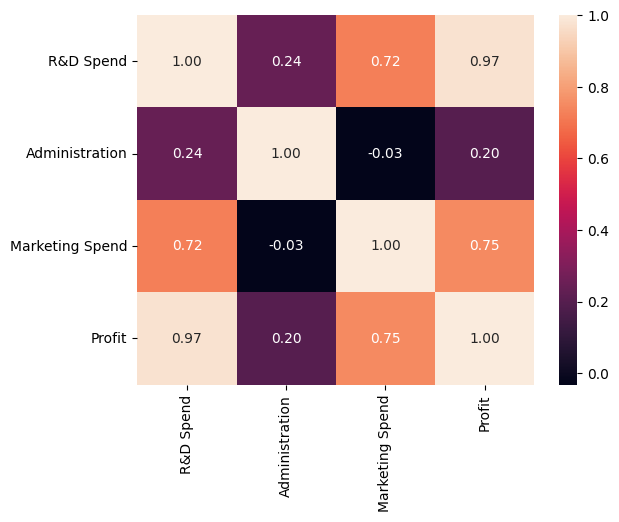

In [37]:
import seaborn as sns
sns.heatmap(startupdata.corr(), annot=True, fmt=".2f")
plt.show()

# **Splitting data**

In [38]:
X,y=startupdata[['R&D Spend','Marketing Spend']], startupdata['Profit']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=123)# splitting the dataframe into train and test data

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)






(30, 2)
(20, 2)
(30,)
(20,)


#**LinearRegression**

In [40]:
# Now apply linear regression model on training dataset
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [41]:
# to find the intercept of our model we use  intercept_
print("intercept=",model.intercept_) 

intercept= 51457.01855641004


In [42]:
# To find  slope of our model we use coef_
print("slope=",model.coef_)

slope= [0.69789263 0.04728894]


In [43]:
#a=predict interpercentage
a=model.predict(X_test)

y_test=y_test
predictions=a.reshape(-1,)


diff=pd.DataFrame({'Actual':y_test,'Predicted':predictions})
diff


,Actual,Predicted
10,146121.95,133418.185041
13,134307.35,127606.086973
30,99937.59,99032.009241
46,49490.75,66425.297107
18,124266.90,129434.515804
0,192261.83,189163.177927
40,78239.91,79695.778100
12,141585.52,128778.480890
29,101004.64,102309.060256
8,152211.77,150318.617908


A perfect model would have a Root Mean Squared Error value of 0.

A perfect model would have a Mean Squared Error value of 0.

A perfect model would have a R2 Error value of 1.




In [44]:
z=model.predict(X_test) 
predictions=z.reshape(-1,)
print('R2 error:',metrics.r2_score(y_test, predictions))
print('mean square error',(metrics.mean_squared_error(y_test,predictions,squared=True)))
print('root mean square error',metrics.mean_squared_error(y_test,predictions,squared=False))


R2 error: 0.9352911659212076
mean square error 137735325.85095367
root mean square error 11736.069437889062


#**Ridge Regression**

In [45]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)



Ridge()

In [46]:
z=ridge.predict(X_test) 
predictions=z.reshape(-1,)
print('R2 error:',metrics.r2_score(y_test, predictions))
print('mean square error',(metrics.mean_squared_error(y_test,predictions,squared=True)))
print('root mean square error',metrics.mean_squared_error(y_test,predictions,squared=False))


R2 error: 0.9352911659145654
mean square error 137735325.8650921
root mean square error 11736.069438491411


#**Lasso Regression**


In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)


Lasso()

In [48]:
z=lasso.predict(X_test) 
predictions=z.reshape(-1,)
print('R2 error:',metrics.r2_score(y_test, predictions))
print('mean square error',(metrics.mean_squared_error(y_test,predictions,squared=True)))
print('root mean square error',metrics.mean_squared_error(y_test,predictions,squared=False))


R2 error: 0.9352911661556027
mean square error 137735325.35203463
root mean square error 11736.069416633263


#**Polynomial Regression**

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model.fit(X_train_poly, y_train)
 


LinearRegression()

In [50]:
z=model.predict(X_test_poly) 
predictions=z.reshape(-1,)
print('R2 error:',metrics.r2_score(y_test, predictions))
print('mean square error',(metrics.mean_squared_error(y_test,predictions,squared=True)))
print('root mean square error',metrics.mean_squared_error(y_test,predictions,squared=False))


R2 error: 0.8659572504527845
mean square error 285315321.310887
root mean square error 16891.279445645523


#**Bayesian Linear Regression**

In [51]:
from sklearn.linear_model import BayesianRidge

Byr = BayesianRidge()
Byr.fit(X_train, y_train)






BayesianRidge()

In [52]:
z=Byr.predict(X_test) 
predictions=z.reshape(-1,)
print('R2 error:',metrics.r2_score(y_test, predictions))
print('mean square error',(metrics.mean_squared_error(y_test,predictions,squared=True)))
print('root mean square error',metrics.mean_squared_error(y_test,predictions,squared=False))


R2 error: 0.9335326892861908
mean square error 141478313.27722093
root mean square error 11894.4656574905


#**svr**

In [53]:
from sklearn.svm import SVR
k = SVR()
k.fit(X_train, y_train)




SVR()

In [56]:
z=k.predict(X_test) 
predictions=z.reshape(-1,)
print('R2 error:',metrics.r2_score(y_test, predictions))
print('mean square error',(metrics.mean_squared_error(y_test,predictions,squared=True)))
print('root mean square error',metrics.mean_squared_error(y_test,predictions,squared=False))


R2 error: -0.06651479436304286
mean square error 2270119139.3371205
root mean square error 47645.76727619275


In [62]:
input_data=[]
a1=int(input("R&D Spend:"))
a2=int(input("Marketing Spend"))
input_data.append(a1)
input_data.append(a2)

R&D Spend:165349
Marketing Spend471784


In [63]:

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lasso.predict(input_data_reshaped)
print("profit:",*prediction)

profit: 189163.03362303556


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
